# 2. DeepLC

# 2.0 Introduction

## 2.0.1 High Performance/Pressure Liquid Chromatography
As all data acquisition parts in LC-IM-MS the LC part separates analytes. In this case the separation is based on the physicochemical properties of our peptides. In most cases peptides are separated based on their hydrophobicity in so-called reverse-phase LC. A more detailed explanation is provided here: https://www.ssi.shimadzu.com/products/liquid-chromatography/knowledge-base/hplc-basics.html


## 2.0.2 Mobile and stationary phase; migration through the column
In HPLC the separation happens in a column and this separation is achieved with two phases

The sample is pumped the column with two solvents that form the mobile phase (A and B):
<img src="https://www.ssi.shimadzu.com/sites/ssi.shimadzu.com/files/products/images/hplc/knowledge-base/hplc-screening-gradients-1.png" alt="mobile" width="400"/>

The analytes in the sample interact with both the stationary and mobile phase. The physicochemical properties of the peptides dictate how much they can interact with either of the two phases. (More) interaction with the mobile phase results in migration of the peptides in the column:

![workflow_lc](https://www.ssi.shimadzu.com/sites/ssi.shimadzu.com/files/products/images/hplc/knowledge-base/sample-bands-animation.gif)

Source: https://www.ssi.shimadzu.com/products/liquid-chromatography/knowledge-base/hplc-basics.html

### Before everything, we need to import the required libraries and dependendies.
The main package that we are using is DeepLC which we need to install it by running the code below and as it is a big package you need to restart your notebook kernel session by either clicking on restart session after this block of code is executed or by clicking on "Runtime" and choosing "Restart session"

In [1]:
!pip install deeplc deeplcretrainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.2/32.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [32]:
# Import default libs
import re
import os

# Import data libs
import pandas as pd

# Import DeepLC
from deeplc import DeepLC
from deeplc import FeatExtractor

# Import plotting libs
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress warnings (or at least try...)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore', category=FutureWarning)


# 2.1 DeepLC predictions

## 2.1.1 Reading data and preparing instances of DeepLC objects

First we will read a table that contains all of our data:

In [2]:
df = pd.read_csv("https://dl.dropboxusercontent.com/s/bok4w3jw2gxohbz/deeplc_input.csv",index_col=0)

The data looks like this with more 2 million rows:

In [3]:
df

,scan,best_psm,database_peptide,modifications,precursor_mass,peptide_mass,rt,q_value
2,4,1,AGAVVGK,NaN,599.362768,600.359497,0.765235,0.706835
3,4,0,GAAAMGK,NaN,599.362768,604.300232,0.765235,0.768968
11,209,0,SAAAAAR,NaN,616.327734,616.329224,28.547861,0.679285
12,209,0,TQGSAAPGSK,3|semi_tryptic,616.327734,616.318054,28.547861,0.551056
13,209,1,GSETPGATPGSK,5|semi_tryptic,616.327734,616.318054,28.547861,0.089244
...,...,...,...,...,...,...,...,...
4452830,128083,1,SIEDYSQSIHTRTISGSPR,17|ethylamino,2160.093481,2160.092529,10516.730400,0.505389
4452832,128083,0,SIAASRFAPHIEKCIGMGR,8|Ala->Met|14|carbamidomethyl,2160.093481,2160.075684,10516.730400,0.668446
4452833,128083,0,SIAGFVASINEGMTRWFSR,13|Met->Tyr,2160.093481,2160.075195,10516.730400,0.516400
4452834,128083,0,SIAEAAMYWIVNWPRPQR,17|Gln->Thr,2160.093481,2160.093994,10516.730400,0.645799


We have multiple columns describing the scan number, if a PSM is the best ranked PSM, if there are any modifications, the precursor mass, the peptide mass, the observed retention time, and the associated q-value with the PSM.

For DeepLC we need strings instead of NaN in the modifications column, so lets replace those with empty strings:

In [12]:
df.fillna("",inplace=True)

Here we sample rows from the original table, this is purely done for computational reasons (e.g., on a laptop). Feel free to increase the numbers if you have a faster system.

In [13]:
num_total_rows_select = 5000
num_calib = 250

sub_df_pred = df[df["scan"].isin(list(set(df["scan"].sample(num_total_rows_select))))]
sub_df_calib = sub_df_pred[sub_df_pred["scan"].isin(list(set(sub_df_pred[sub_df_pred["q_value"] < 0.01]["scan"].sample(num_calib))))]

Here we make sure that the column names are changed to something that DeepLC recognizes:

In [15]:
sub_df_pred.rename({
    "database_peptide" : "seq",
    "rt" : "tr"
},axis=1,inplace=True)

sub_df_calib.rename({
    "database_peptide" : "seq",
    "rt" : "tr"
},axis=1,inplace=True)

Make a feature extraction object. This step can be skipped if you want to use the default feature extraction in DeepLC. This does allow us to select for example a different file for the modifications we want to incorperate.

In [16]:
f_extractor = FeatExtractor(
                            add_sum_feat=False,
                            ptm_add_feat=False,
                            ptm_subtract_feat=False,
                            add_comp_feat=False,
                            cnn_feats=True,
                            verbose=True
)

Initiate a DeepLC instance that will perform the calibration and predictions:

In [17]:
dlc = DeepLC(
    cnn_model=True,
    f_extractor=f_extractor,
    pygam_calibration=False,
    verbose=True
)

We need to calibrate predictions to our specific LC setup to make them valid, so first we will feed some predictions to our DeepLC instance:

In [26]:
dlc.calibrate_preds(seq_df=sub_df_calib[sub_df_calib["best_psm"]==1])

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


{}

You can safely ignore most errors and warnings


## 2.1.2 Is calibration a necessity?

Lets run our mode to generate predictions without calibration:

In [27]:
preds_uncal = dlc.make_preds(seq_df=sub_df_calib, calibrate=False)
sub_df_calib["preds_uncal"] = preds_uncal

4/4 [==============================] - 5s 940ms/step


And lets also make calibrated predictions for the comparison:

In [28]:
preds_cal = dlc.make_preds(seq_df=sub_df_calib)
sub_df_calib["preds"] = preds_cal

4/4 [==============================] - 6s 943ms/step


Now for the comparison of the two:

Uncalibrated predictions: 


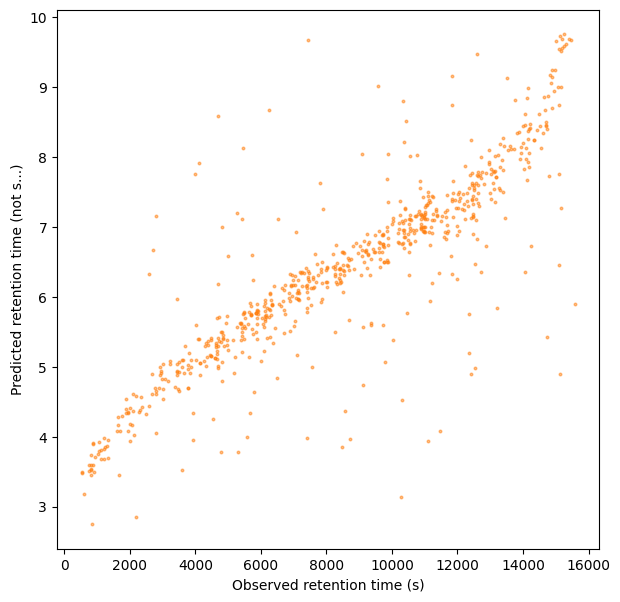

Calibrated predictions: 


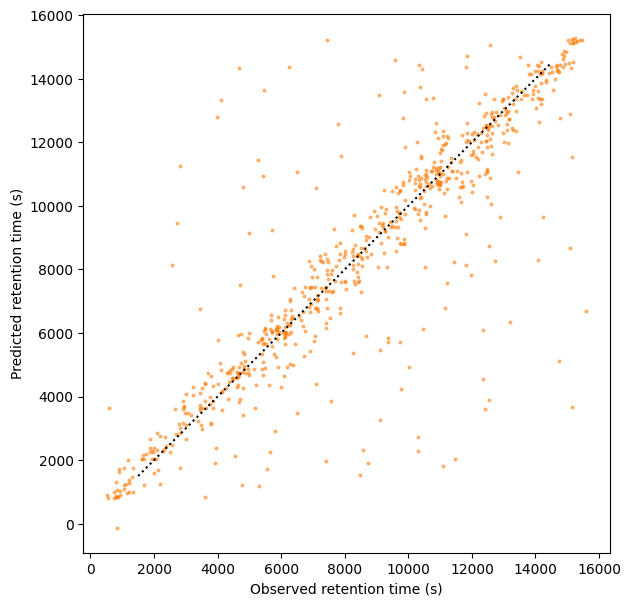

In [37]:
sub_df_calib_lowerrank = sub_df_calib[sub_df_calib["best_psm"]==0]
sub_df_calib_firstrank = sub_df_calib[sub_df_calib["best_psm"]==1]

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_calib_firstrank["tr"],sub_df_calib_firstrank["preds_uncal"],s=3.5, alpha=0.5,color="tab:orange")
plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (not s...)")

print("Uncalibrated predictions: ")
plt.show()

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.set_aspect('equal')

print("Calibrated predictions: ")
plt.scatter(sub_df_calib_firstrank["tr"],sub_df_calib_firstrank["preds"],s=3.5, alpha=0.5,color="tab:orange")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")

plt.show()

# 2.2 Prediction errors of (ranked) PSMs

## 2.2.1 Comparing rank 1 and lower ranked PSMs for the calibration set

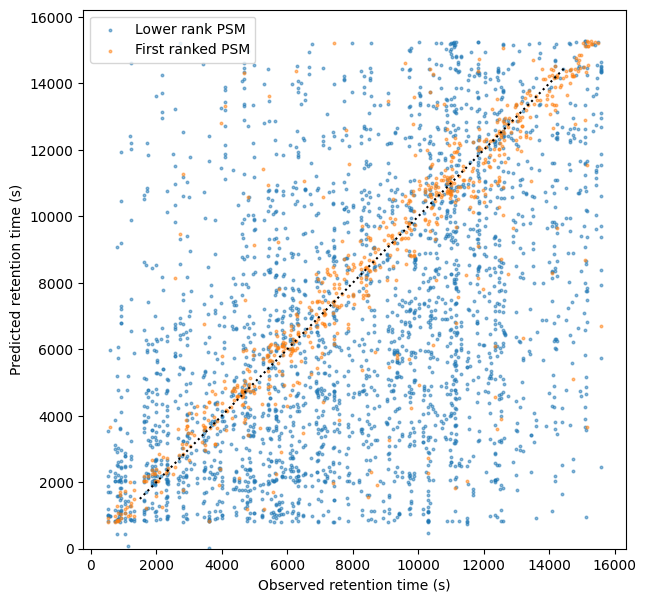

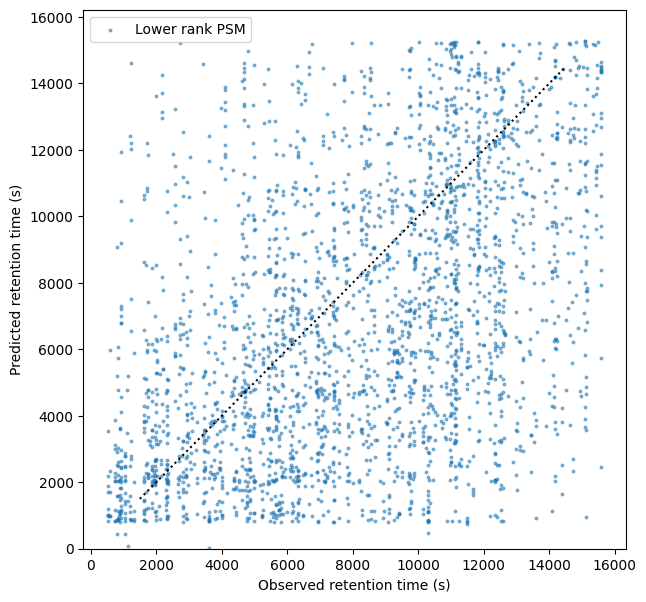

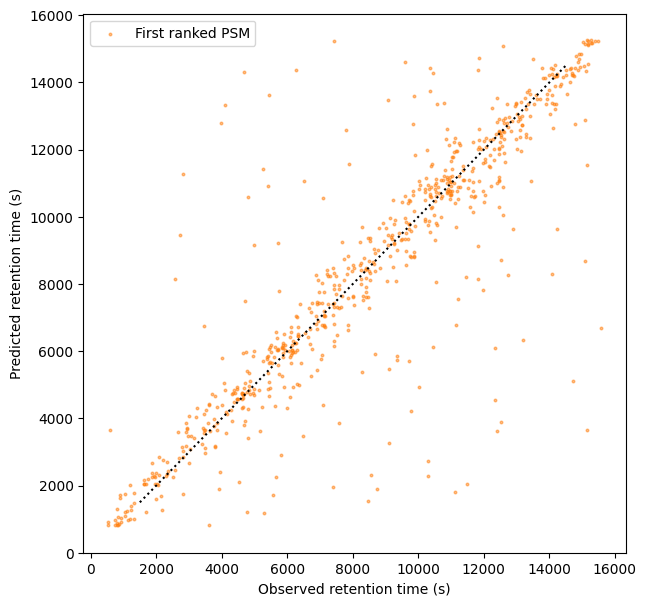

In [53]:
# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_calib_lowerrank["tr"],sub_df_calib_lowerrank["preds"],s=3.5, alpha=0.5,label="Lower rank PSM")
plt.scatter(sub_df_calib_firstrank["tr"],sub_df_calib_firstrank["preds"],s=3.5, alpha=0.5,label="First ranked PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_calib_lowerrank["tr"],sub_df_calib_lowerrank["preds"],s=3.5, alpha=0.5, color="tab:blue",label="Lower rank PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_calib_firstrank["tr"],sub_df_calib_firstrank["preds"],s=3.5, alpha=0.5, color="tab:orange",label="First ranked PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

## 2.2.2 Comparing rank 1 and lower ranked PSMs for the whole data set

Lets first make predictions (it might take a couple of minutes):

In [43]:
preds = dlc.make_preds(seq_df=sub_df_pred)
sub_df_pred["preds"] = preds

76/76 [==============================] - 102s 1s/step


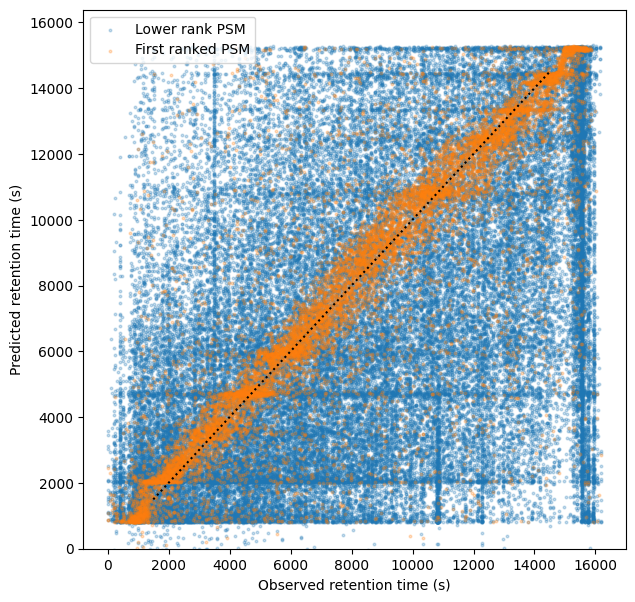

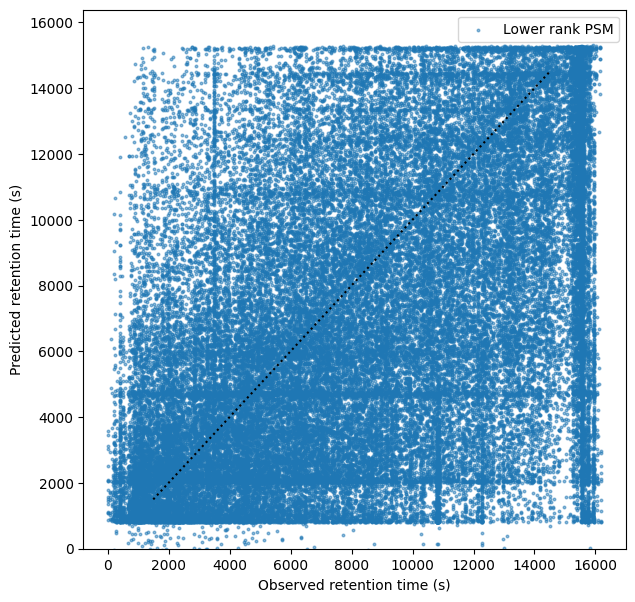

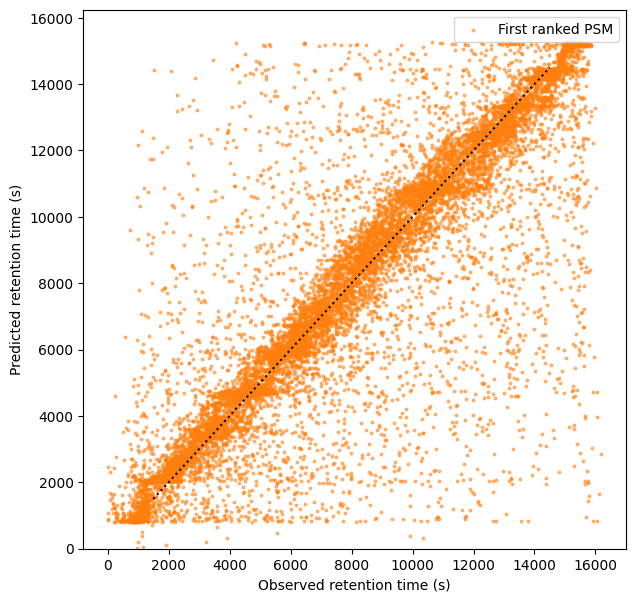

In [54]:
sub_df_pred_lowerrank = sub_df_pred[sub_df_pred["best_psm"]==0]
sub_df_pred_firstrank = sub_df_pred[sub_df_pred["best_psm"]==1]

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_pred_lowerrank["tr"],sub_df_pred_lowerrank["preds"],s=3.5, alpha=0.25,label="Lower rank PSM")
plt.scatter(sub_df_pred_firstrank["tr"],sub_df_pred_firstrank["preds"],s=3.5, alpha=0.25,label="First ranked PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_pred_lowerrank["tr"],sub_df_pred_lowerrank["preds"],s=3.5, alpha=0.5, color="tab:blue",label="Lower rank PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

# Init plot
plt.figure(figsize=(7,7))
ax = plt.gca()

# Plot data
plt.scatter(sub_df_pred_firstrank["tr"],sub_df_pred_firstrank["preds"],s=3.5, alpha=0.5, color="tab:orange",label="First ranked PSM")
plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")
plt.ylim(ymin=0)

plt.xlabel("Observed retention time (s)")
plt.ylabel("Predicted retention time (s)")
plt.legend()

plt.show()

Execute the following cell to see the error distributions:

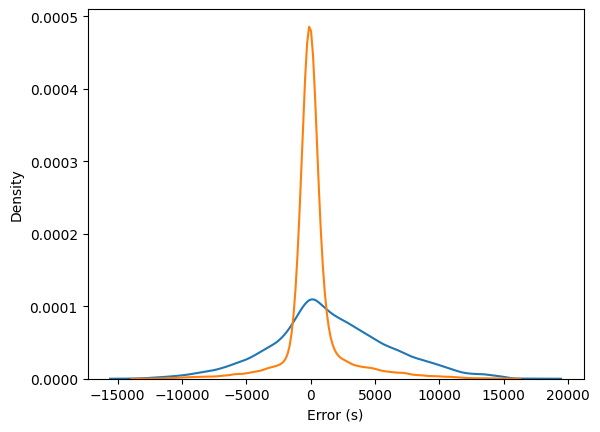

In [55]:
sns.distplot(sub_df_pred_lowerrank["tr"]-sub_df_pred_lowerrank["preds"],
             hist = False, kde = True, label="Lower rank PSM")
sns.distplot(sub_df_pred_firstrank["tr"]-sub_df_pred_firstrank["preds"],
             hist = False, kde = True, label="First ranked PSM")
plt.xlabel("Error (s)")
plt.show()

# 2.3 Predict retention times of modified peptides

## 2.3.1 Effect of modifications on retention time

In [58]:
def plot_modification(sub_df_best,modification="carbamidomethyl"):
    # Init plot
    plt.figure(figsize=(7,7))
    ax = plt.gca()

    # Plot data
    plt.scatter(sub_df_best[sub_df_best["modifications"].str.contains(modification)]["tr"],sub_df_best[sub_df_best["modifications"].str.contains(modification)]["preds"],alpha=0.5,s=4)
    plt.plot([1500,14500],[1500,14500],c="black",linestyle="dotted")

    plt.title(modification)
    plt.xlabel("Observed retention time (s)")
    plt.ylabel("Predicted retention time (s)")

    plt.show()

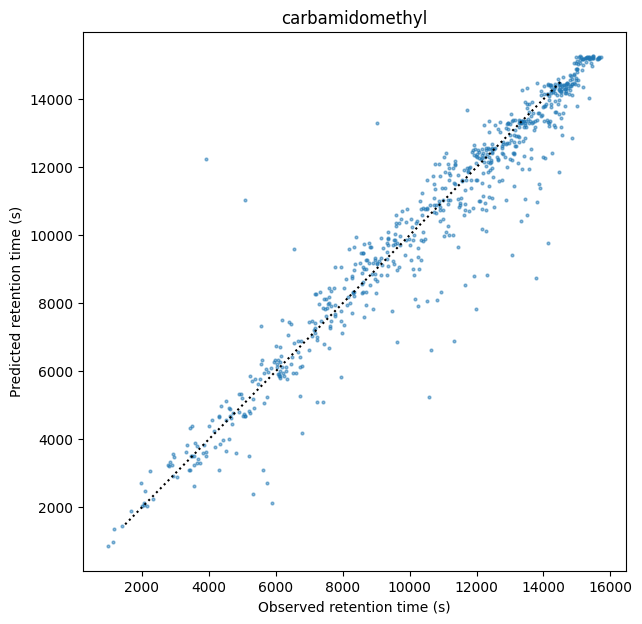

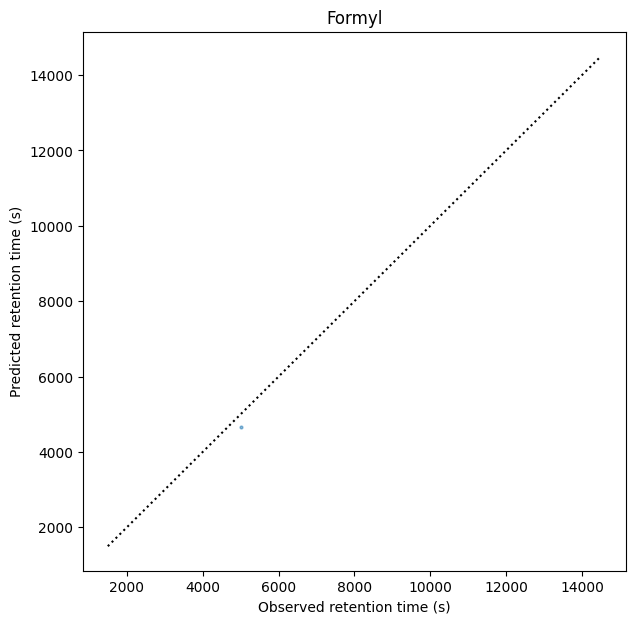

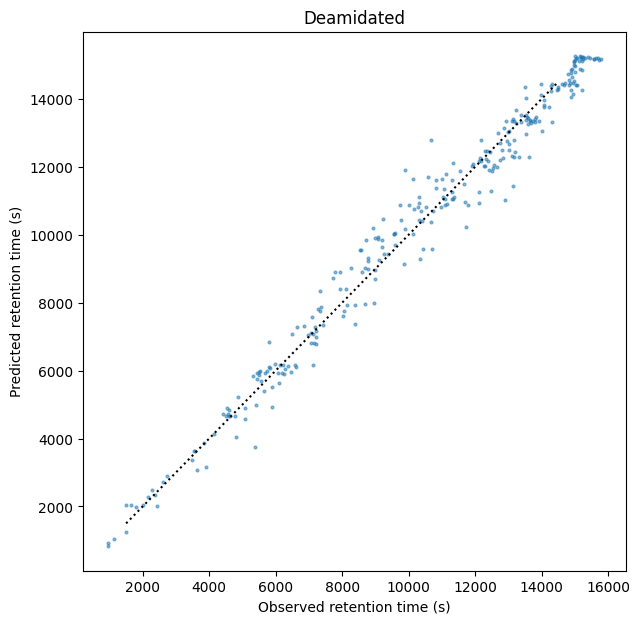

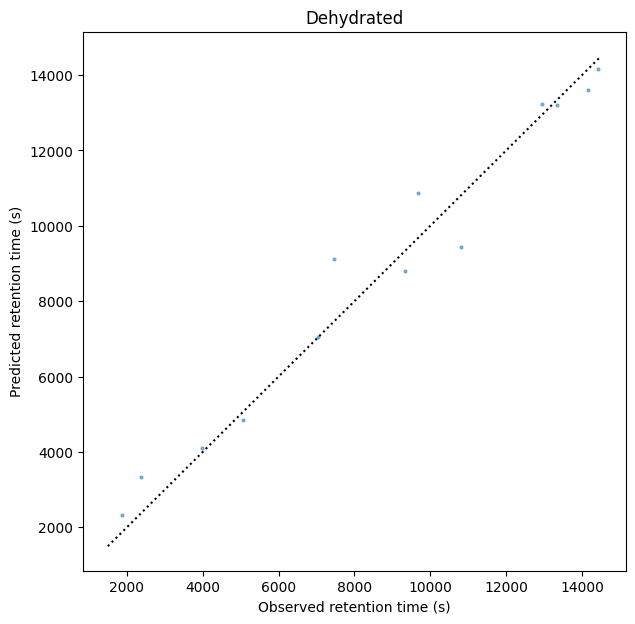

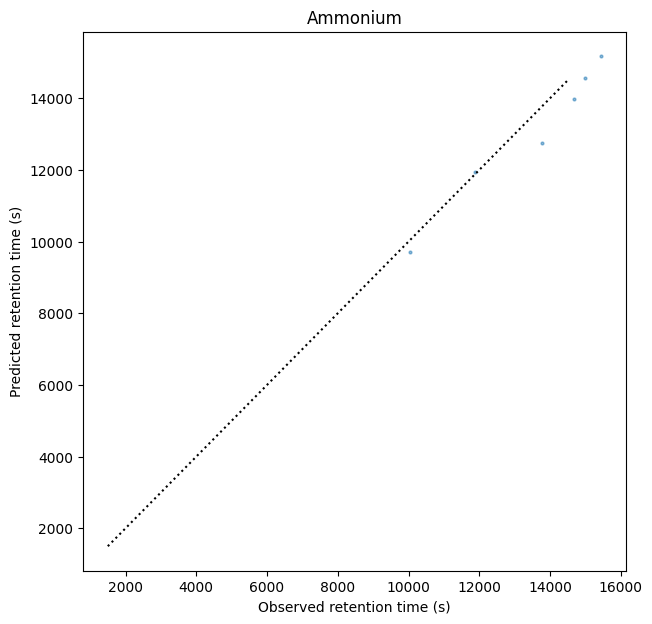

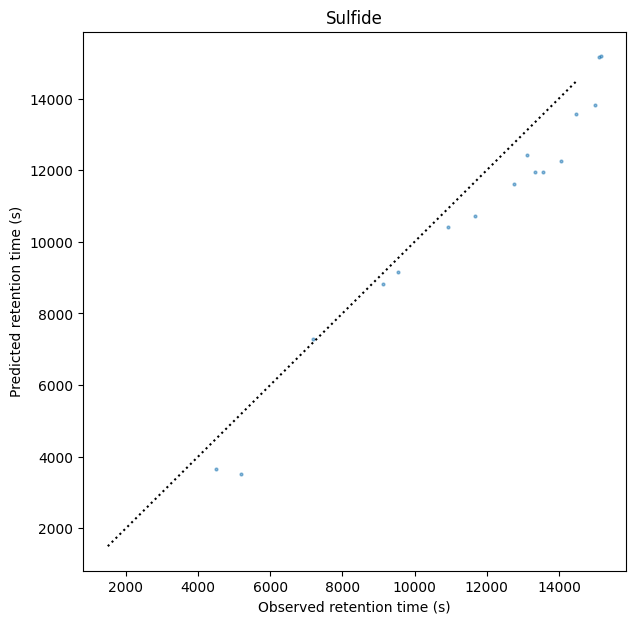

In [59]:
sub_df_best = sub_df_pred[sub_df_pred["best_psm"]==1]
sub_df_best = sub_df_best[sub_df_best["q_value"]<0.001]

plot_modification(sub_df_best,modification="carbamidomethyl")
plot_modification(sub_df_best,modification="Formyl")
plot_modification(sub_df_best,modification="Deamidated")
plot_modification(sub_df_best,modification="Dehydrated")
plot_modification(sub_df_best,modification="Ammonium")
plot_modification(sub_df_best,modification="Sulfide")




# 2.4 Design your own peptides and modifications and predict their retention time

## 2.4.1 Make predictions for your own peptide and modifications combos

Provide the data for peptides you want to predict:

In [60]:
dict_effect_aa = {
    "seq" : ["IIVINKPNNPIGK", "IIVINTPNNPIGK", "IIVINAPNNPIGK", "IIVINWPNNPIGK"],
    "modifications" : ["","","",""],
    "tr" : [0,1,2,3]
}

df_effect_aa = pd.DataFrame(dict_effect_aa)

In [61]:
preds = dlc.make_preds(seq_df=df_effect_aa)

1/1 [==============================] - 1s 505ms/step


Lets have a look at their predictions:

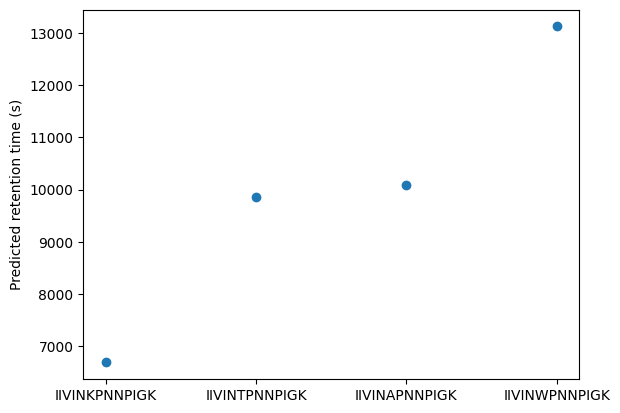

In [62]:
plt.scatter(df_effect_aa.index,preds)
plt.xticks(df_effect_aa.index,df_effect_aa["seq"])
plt.ylabel("Predicted retention time (s)")
plt.show()

Provide the data for peptides+modifications you want to predict:

In [63]:
#IIVINTPNNPIGK
dict_effect_aa = {
    "seq" : ["IIVINCPNNPIGK", "IIVINCPNNPIGK", "IIVINQPNNPIGK", "IIVINQPNNPIGK", "IIVINMPNNPIGK", "IIVINMPNNPIGK"],
    "modifications" : ["","6|carbamidomethyl","","6|Deamidated","","6|Formyl"],
    "tr" : [0,1,2,3,4,5]
}

df_effect_aa = pd.DataFrame(dict_effect_aa)

In [64]:
preds = dlc.make_preds(seq_df=df_effect_aa)

1/1 [==============================] - 0s 487ms/step


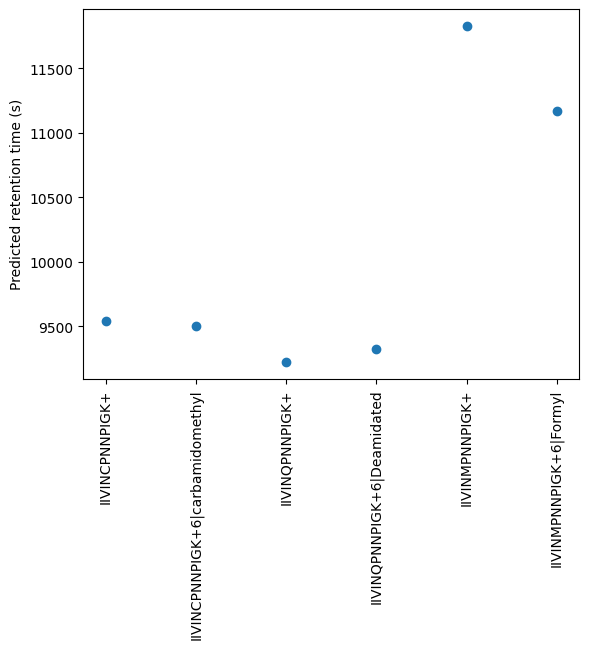

In [65]:
plt.scatter(df_effect_aa.index,preds)
plt.xticks(df_effect_aa.index,df_effect_aa["seq"]+"+"+df_effect_aa["modifications"],rotation=90)
plt.ylabel("Predicted retention time (s)")
plt.show()